# Analysis of the data from the Ising model simulation


We got one file for ten different lattice sizes (range(10,100) every 10)
- 2000 K calls to the local metropolis algorithm
- measures taken every 25 updates
- $\beta$ values taken in the interval (0.3,0.55) and each point with even spacing (0.002, total points $\sim$126)  

In [16]:
import numpy as np
from tqdm.notebook import tqdm
from time import sleep
import pylab
import os
import matplotlib.pyplot as plt
from matplotlib import style
#speed things up
import numba
from numba import njit
from numba import jit
from numba import prange
from numba_progress import ProgressBar
from scipy.ndimage import convolve, generate_binary_structure
from timeit import default_timer as timer
#style
plt.style.use(['science','notebook','grid','seaborn'])
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('legend',fontsize=20)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)


fig = (12,6)
params = {'figure.figsize': fig,
        'legend.fontsize': 2*fig[1],
         'axes.labelsize': 1.8*fig[1],
         'axes.titlesize':2.4*fig[1],
         'xtick.labelsize':1.2*fig[1],
         'ytick.labelsize':1.2*fig[1]}
pylab.rcParams.update(params)


/var/folders/7b/mxhdlhl16yjddckjcf2qpms00000gn/T/ipykernel_1226/3279780225.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['science','notebook','grid','seaborn'])


In [2]:
files = np.arange(10,110,10)
for file in files:
    filename = f"./simulations_old/simulation_{file}.txt"
    bs, es, ms = np.loadtxt(filename, unpack=True)
    if (file==10):
        energy_mat = np.zeros((len(bs),len(files)+1))
        magnes_mat = np.zeros((len(bs),len(files)+1))
    
    energy_mat[:,int(file/10)-1] = es
    magnes_mat[:,int(file/10)-1] = ms
       

In [4]:
(bs).shape[0]

1260000

In [17]:
mat_term= np.column_stack((bs, magnes_mat[:,9]))
mat_termc= np.column_stack((bs, magnes_mat[:,1]))
ind_term= mat_term[:,0]
mat_term[ind_term==0.55,1]
len(mat_term[ind_term==0.3,1])
plt.plot(magnes_mat[ind_term==0.55,1])
#plt.plot(magnes_mat[ind_term==0.5,4])
#plt.plot(np.abs(magnes_mat[ind_term==0.5,5]))
plt.plot(magnes_mat[ind_term==0.55,6],label='70x70')
#plt.plot(magnes_mat[ind_term==0.55,8])
#plt.plot(magnes_mat[ind_term==0.55,9])
plt.xlabel('ciao')
plt.ylabel('ciao')
plt.title('ciao')
plt.legend()


NameError: name 'bs' is not defined

In [ ]:
np.var

In [4]:
beta_exp = np.round(np.arange(0.3,0.55,0.002), decimals=3)

In [5]:
magns_L=np.zeros((len(beta_exp),10))
var_magns_L=np.zeros((len(beta_exp),10))
for i in range(0,10):
    as_matrix = np.column_stack((bs,magnes_mat[:,i]))
    m=[]
    v=[]
    for b in tqdm(beta_exp):
        indices = as_matrix[:,0]
        mgns = np.sum(np.abs(as_matrix[(indices == b),1]))
        var=np.var(np.abs(as_matrix[(indices == b),1]))
        mgns = mgns/(len(as_matrix[(indices == b),1]))
        m.append(mgns)
        v.append(var)
    magns_L[:,i]=m
    var_magns_L[:,i]=v








  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

In [173]:
len(as_matrix[:,1])/126

10000.0

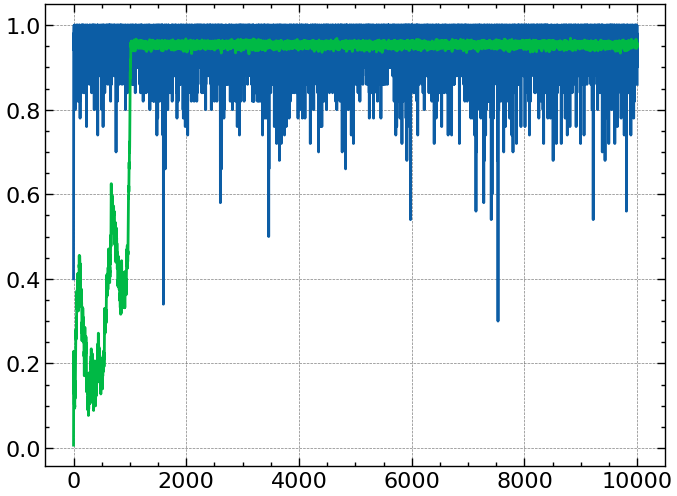

In [6]:
#storia Mc del 9 a confronto del 1 per stessa temperatura >0.5
plt.plot(np.abs(magnes_mat[indices==0.55,0]))#20x20
plt.plot(np.abs(magnes_mat[indices==0.55,9])) #10x10


  0%|          | 0/126 [00:00<?, ?it/s]

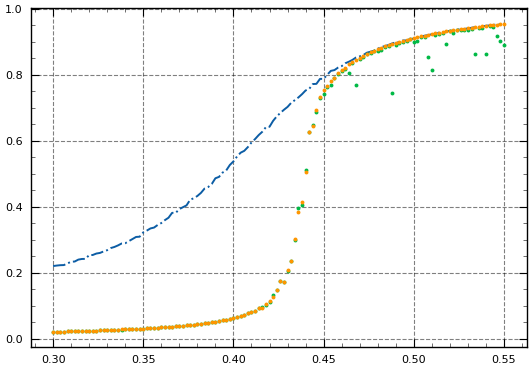

In [12]:
#Proviamo allora a scartare i primi duemila punti e riplottare il valor medio della magnetizzazione
as_matrix_cut = np.column_stack((bs,magnes_mat[:,9]))    
m_cut=[]
v_cut=[]
for b in tqdm(beta_exp):
    indices_cut = as_matrix_cut[:,0]
    mgns_cut = np.sum(np.abs(as_matrix_cut[(indices_cut == b),1])[2000:])
    var_cut=np.var(np.abs(as_matrix_cut[(indices_cut == b),1]))
    mgns_cut = mgns_cut/(len(as_matrix_cut[(indices_cut == b),1][2000:]))
    m_cut.append(mgns_cut)
    v_cut.append(var_cut)
magns_10_cut = np.zeros((len(beta_exp),2))
magns_10_uncut = np.zeros((len(beta_exp),2))
magns_10_cut[:,0]=beta_exp
magns_10_cut[:,1]=m_cut

magns_10_uncut[:,1]=magns_L[:,9]


plt.plot(beta_exp,magns_L[:,0], "-.",label='uncut 10x10')
plt.plot(beta_exp, magns_10_uncut[:,1],".", label='uncut 100x100')
plt.plot(beta_exp, magns_10_cut[:,1],".", label='cut 100x100')



(0.29, 0.58)

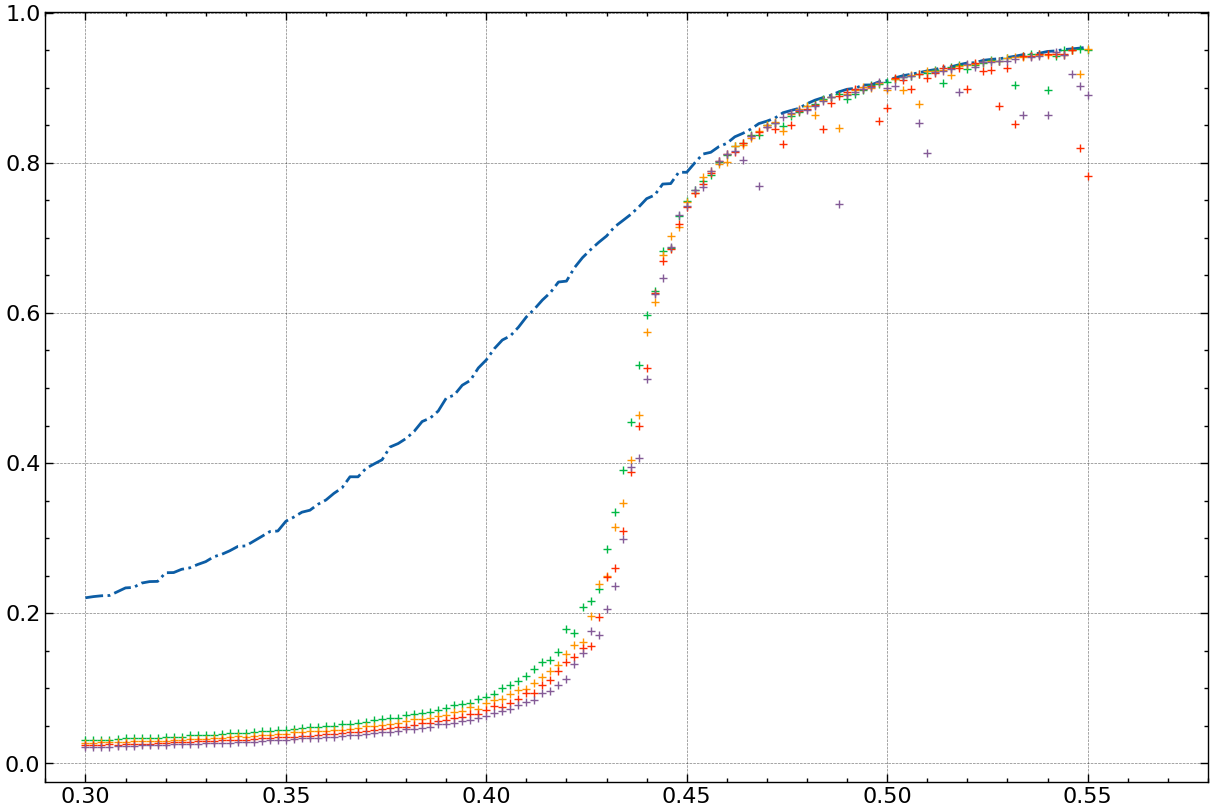

In [170]:
plt.figure(figsize=(15,10))
plt.plot(beta_exp,magns_L[:,0], "-.")
#plt.plot(beta_exp,magns_L[:,1], "-.")
#plt.plot(beta_exp,magns_L[:,2], "-.")
#plt.plot(beta_exp,magns_L[:,3], "-.")
#plt.plot(beta_exp,magns_L[:,4], "-.")
#plt.plot(beta_exp,magns_L[:,5], "-.")
plt.plot(beta_exp,magns_L[:,6], "+")
plt.plot(beta_exp,magns_L[:,7], "+")
plt.plot(beta_exp,magns_L[:,8], "+")
plt.plot(beta_exp,magns_L[:,9], "+")
plt.xlim(0.29,0.58)


In [ ]:
plt.plot(var_magns_L[:,6])

In [159]:
b_test3, m_test3 = np.loadtxt('./test/simulation_70_test3.txt',unpack=True)
mat_test3=np.column_stack((b_test3,m_test3))
indici_test3 = mat_test3[:,0]
m_test3=[]
v_test3=[]
for b in tqdm(beta_exp):
    mgns_t3 = np.sum((np.abs(mat_test3[(indici_test3 == b),1])))
    var_t3=np.var(np.abs(mat_test3[(indici_test3 == b),1])[50000:])
    mgns_t3 = mgns_t3/(len(mat_test3[(indici_test3 == b),1]))
    m_test3.append(mgns_t3)
    v_test3.append(var_t3)




  0%|          | 0/126 [00:00<?, ?it/s]

(-6.25, 131.25)

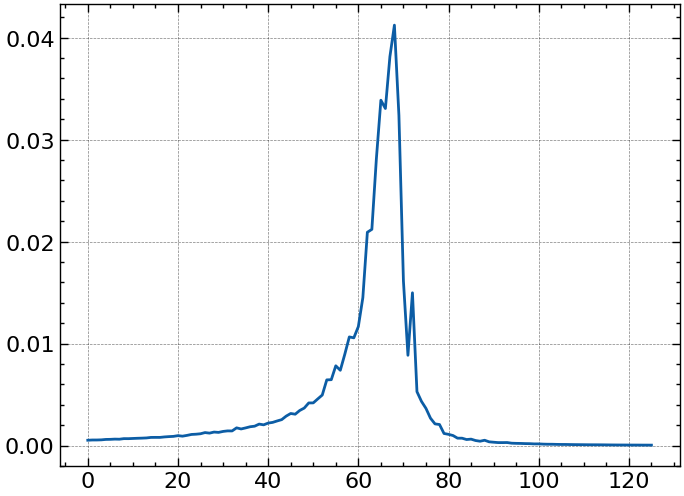

In [160]:
plt.plot(v_test3)
plt.xlim( )


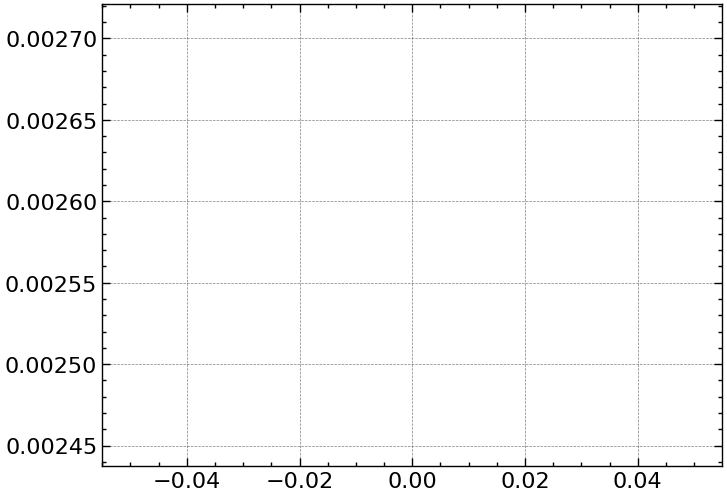

In [153]:
plt.plot(np.var(np.abs(mat_test3[indici_test3==0.55,1])))

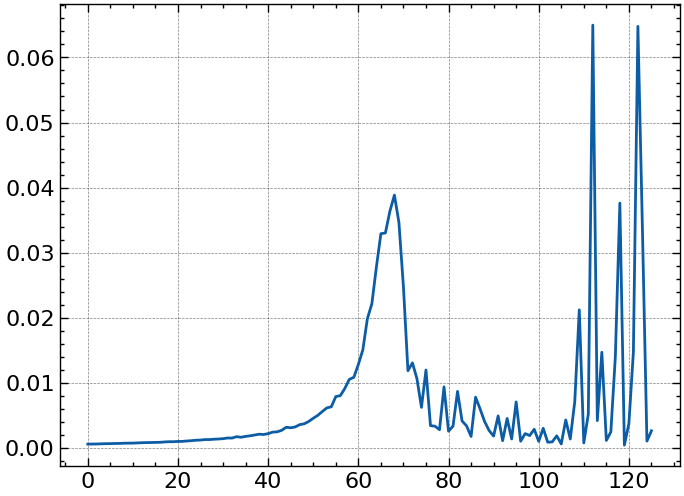

In [145]:
#plt.plot(beta_exp,m_test3)
plt.plot(v_test3)

In [ ]:
plt.plot(var_magns_L[:,6])
plt.plot(v_test3)

In [ ]:
b_test1,m_test1 = np.loadtxt('simulation_70_test1.txt',unpack=True)
mat_test1=np.column_stack((b_test1,m_test1))
indici_test1 = mat_test1[:,0]
m_test1=[]
v_test1=[]
for b in tqdm(beta_exp):
    mgns_t1 = np.sum(np.abs(mat_test1[(indici_test1 == b),1]))
    var_t1=np.var(np.abs(mat_test1[(indici_test1 == b),1]))
    mgns_t1 = mgns_t1/(len(mat_test1[(indici_test1 == b),1]))
    m_test1.append(mgns_t1)
    v_test1.append(var_t1)


In [ ]:
b_test4,m_test4 = np.loadtxt('simulation_70_test4.txt',unpack=True)
mat_test4=np.column_stack((b_test4,m_test4))
indici_test4 = mat_test4[:,0]
m_test4=[]
v_test4=[]
for b in tqdm(beta_exp):
    mgns_t4 = np.sum(np.abs(mat_test4[(indici_test4 == b),1]))
    var_t4=np.var(np.abs(mat_test4[(indici_test4 == b),1]))
    mgns_t4 = mgns_t4/(len(mat_test4[(indici_test4 == b),1]))
    m_test4.append(mgns_t4)
    v_test4.append(var_t4)

In [ ]:
b_test2,m_test2 = np.loadtxt('simulation_70_test2.txt',unpack=True)
mat_test2=np.column_stack((b_test2,m_test2))
indici_test2 = mat_test2[:,0]
m_test2=[]
v_test2=[]
for b in tqdm(beta_exp):
    mgns_t2 = np.sum(np.abs(mat_test2[(indici_test2 == b),1]))
    var_t2=np.var(np.abs(mat_test2[(indici_test2 == b),1]))
    mgns_t2 = mgns_t2/(len(mat_test2[(indici_test2 == b),1]))
    m_test2.append(mgns_t2)
    v_test2.append(var_t2)

In [ ]:
plt.figure(figsize=(15,10))



#plt.plot(var_magns_L[:,6],label='original')
plt.plot(v_test1,label='test1')
#plt.plot(v_test2, label='test2')
plt.plot(v_test3,label='test3')
#plt.plot(v_test4, label='test4')
plt.legend()

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(magns_L[:,6],label='original')
plt.plot(magns)
#plt.plot(m_test1,label='test1')
plt.plot(m_test2,label='test2')
#plt.plot(m_test3,label='test3')
#plt.plot(m_test4, label='test4')
plt.legend()